# Funciones II

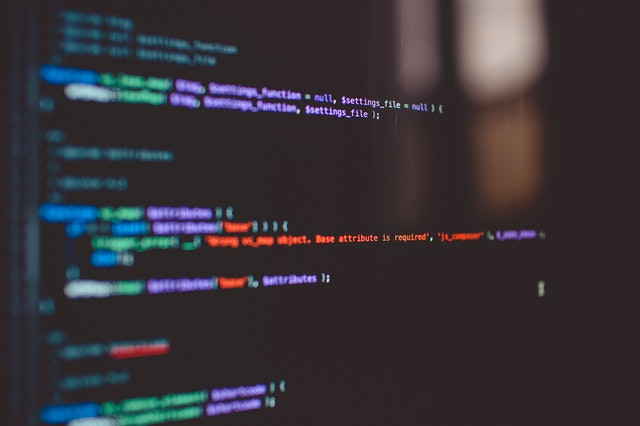

## Argumentos vs Parametros

Durante la definicion de la funcion, los valores que le enviamos a una funcion, se conocen como __parametros__

Mientras que, durante la llamada, estos se llaman __argumentos__

```python
# Esto es un parametro
def saludar(nombre):
  print(f"Hola {nombre}")
```

```python
# Mientras que estos, son argumentos
saludar("Martin")

nombre = "Pedro"
saludar(nombre)
```

## Argumentos por posicion

Cuando le enviamos valores a una funcion, por defecto, estos se reciben y asignan en el orden en que se hayan declarado los parametros en la funcion

Supongamos que contamos con la siguiente funcion

```python
def suma(a,b):
  return a+b
```

Si llamamos a la misma de la siguiente forma, `suma(2,3)`, el parametro $a$ tomara el valor de $2$ y el parametro $b$ tomara el valor $3$

Esto se debe a la forma en la que hemos declarado los parametros, y como los estamos ordenando al momento de enviarselos a la funcion.

Pero que pasa si no respeto el orden?

En el caso de la suma, el resultado seria el mismo. Pero hay funciones que dependen del orden de los datos para realizar ciertas operaciones.

Imaginemos que contamos con la siguiente funcion

```python
def imprimir_datos(nombre, apellido, edad):
  print(f"{apellido.upper()}, {nombre.title()}. Edad: {edad}")
```

Si yo no respeto el orden, podria tener comportamientos extraños. Y hasta errores.


In [ ]:
def imprimir_datos(nombre, apellido, edad):
  print(f"{apellido.upper()}, {nombre.title()}. Edad: {edad}")

imprimir_datos(25, "Maria", "Perez")

AttributeError: ignored

## Argumentos por nombre

Es una solucion al problema anterior.

Con esto, ya no debo preocuparme por recordar el orden de los parametros. Solo recordar el nombre.

Ya hemos usado esta forma para pasarle argumentos a una funcion. Te acordas?

Si! La funcion `sort`

```python
lista = [1,2,3]

lista.sort(reversed=True)
```

Ahora podemos emplear lo mismo con nuestras funciones

In [ ]:
def imprimir_datos(nombre, apellido, edad):
  print(f"{apellido.upper()}, {nombre.title()}. Edad: {edad}")

imprimir_datos(edad=25, nombre="Maria", apellido="Perez")

PEREZ, Maria. Edad: 25


Como vemos, ahora funciona de forma correcta.

En caso de ser necesario, podemos combinar "argumentos por posicion" con "argumentos por nombre". Pero solo con una condicion.

Los "argumentos por posicion" deben ir primero

In [ ]:
def imprimir_datos(nombre, apellido, edad):
  print(f"{apellido.upper()}, {nombre.title()}. Edad: {edad}")

# Un argumento por posicion, y 2 argumentos por nombre
imprimir_datos("Maria", edad=25, apellido="Perez")

PEREZ, Maria. Edad: 25


In [ ]:
def imprimir_datos(nombre, apellido, edad):
  print(f"{apellido.upper()}, {nombre.title()}. Edad: {edad}")

# Esto no se puede hacer
imprimir_datos(apellido="Perez", nombre="Maria", 25)

SyntaxError: ignored

## Llamadas sin argumentos

Cuando llamamos a una funcion sin pasarle argumentos (cuando si espera recibirlos), obtenemos un mensaje de error.



In [ ]:
def saludar(nombre):
  print(f"Hola {nombre}")

saludar()

TypeError: ignored

Una forma de solucionar este problema, es definir valores por defecto a nuestros parametros.

Si el usuario no nos envia ningun valor para ese argumento, Python tomara el valor indicado en la definicion de la funcion.

Veamos un ejemplo

In [ ]:
def saludar(nombre = "Anonimo/a"):
  print(f"Hola {nombre}")

saludar("Pepe")
saludar()

Hola Pepe
Hola Anonimo/a


In [ ]:
def sumar(a=0,b=0):
  return a+b

print(sumar(2,3))
print(sumar())

5
0


In [ ]:
def sumar(a=None,b=None):
  if a == None or b == None:
    print("Error: debes indicar dos numeros")
    return None
  return a+b

print(sumar(2,3))
print(sumar())

5
Error: debes indicar dos numeros
None


## Argumentos por Valor VS Argumentos por Referencia

La mayoria de las veces, cuando enviamos valores a una funcion, estos se envian por "valor".

Que significa esto? Que la funcion recibe una copia del dato.

Y de que me sirve? En muchos casos, es deseable que la funcion no modifique el contenido original de una variable.

Los numeros, y las cadenas son enviados como "Argumentos por valor".

Veamos esto 🔽

In [ ]:

def incrementar(a):
  print(f"ID de la variable dentro de la funcion antes de ser modificada: {id(a)}")
  a+=1
  print(f"ID de la variable dentro de la funcion despues de ser modificada: {id(a)}")
  return a

numero = 10
print(f"ID de la variable fuera de la funcion: {id(numero)}")

print(f"Valor modificado: {incrementar(numero)}, Valor original: {numero}")


ID de la variable fuera de la funcion: 94843338218272
ID de la variable dentro de la funcion antes de ser modificada: 94843338218272
ID de la variable dentro de la funcion despues de ser modificada: 94843338218304
Valor modificado: 11, Valor original: 10


Si bien los IDs son los mismos, debido a que Python mantiene una referencia al objeto, al momento de modificarlo, Python crea un nuevo objeto y le asigna el valor correspondiente.

Como podemos ver, la variable que se encuentra fuera, se mantiene igual. Con el mismo valor.

Y esto es asi con todos los datos?

No, con las colecciones la historia es distinta.

Las colecciones son argumentos que se enviar "por referencia". Esto quiere decir que al momento de usarlas dentro de la funcion, estaremos referenciando al objeto original.

Que implica? Modificar una lista dentro de una funcion, modificara la lista original que se encuentra fuera de esta. 

Imaginate borrar elementos dentro de tu lista creyendo que estas trabajando con una copia. Catastrofico 🤯

In [ ]:
def incrementar(lista):
  print(f"ID de la lista dentro de la funcion antes de ser modificada: {id(lista)}")
  
  contador = 0
  limite = len(lista)

  while contador < limite:
    lista[contador] += 1
    contador += 1

  print(f"ID de la lista dentro de la funcion despues de ser modificada: {id(lista)}")
  return lista

lista = [1,2,3,4]
print(f"ID de la lista fuera de la funcion: {id(lista)}")

print(f"Valor modificado: {incrementar(lista)}, Valor original: {lista}")

ID de la lista fuera de la funcion: 140716987900864
ID de la lista dentro de la funcion antes de ser modificada: 140716987900864
ID de la lista dentro de la funcion despues de ser modificada: 140716987900864
Valor modificado: [2, 3, 4, 5], Valor original: [2, 3, 4, 5]


Como vemos, el ID siempre es el mismo. Y en el ultimo `print` podemos notar como la lista original tambien se vio afectada 😢

Como lo resolvemos?

Enviandole una copia de nuestra coleccion, a traves del metodo `copy()` disponible en las colecciones

PD: ya lo habiamos usado

In [ ]:
def incrementar(lista):
  print(f"ID de la lista dentro de la funcion antes de ser modificada: {id(lista)}")
  
  contador = 0
  limite = len(lista)

  while contador < limite:
    lista[contador] += 1
    contador += 1

  print(f"ID de la lista dentro de la funcion despues de ser modificada: {id(lista)}")
  return lista

lista = [1,2,3,4]
print(f"ID de la lista fuera de la funcion: {id(lista)}")

print(f"Valor modificado: {incrementar(lista.copy())}, Valor original: {lista}")

ID de la lista fuera de la funcion: 140716988229824
ID de la lista dentro de la funcion antes de ser modificada: 140716988724800
ID de la lista dentro de la funcion despues de ser modificada: 140716988724800
Valor modificado: [2, 3, 4, 5], Valor original: [1, 2, 3, 4]


## Argumentos indeterminados

Los argumentos indeterminados, son una forma de indicarle a una funcion que no sabemos cuantos valores le enviaremos. Pueden ser 0 o muchos.

Por convencion, este tipo de argumentos se trabajan bajo los nombres __*args__ y __**kwargs__ aunque no es obligatorio que se llamen asi.

Lo que no podemos dejar pasar por alto es el uso de los asteriscos.


### *ARGS

Con `*args` podemos definir funciones que reciban una cantidad de argumentos variables.

In [ ]:
def sumatoria(*numeros):

  print(f"Valor de numeros: {numeros}, Tipo de dato: {type(numeros)}")

  suma_total = 0
  for numero in numeros:
    suma_total += numero


  return suma_total

print(f"Valor final: {sumatoria(1,2,3)}")
print(f"Valor final: {sumatoria(1,2,3,4,5,6,7)}")

Valor de numeros: (1, 2, 3), Tipo de dato: <class 'tuple'>
Valor final: 6
Valor de numeros: (1, 2, 3, 4, 5, 6, 7), Tipo de dato: <class 'tuple'>
Valor final: 28


Como vemos, los argumentos variables con un solo '*', no son mas que una tupla de valores.

### **KWARGS

Similar a `*args`, `**kwargs` nos permite recibir una coleccion de valores indeterminados.

La diferencia entre uno y otro, ademas de '\*\*', es que `*args` solo recibe valores, mientras que `**kwargs` recibe pares clave:valor

Esto nos permite darle un nombre a cada argumento que se recibe.

Te suena a alguna coleccion conocida?

Mira el siguiente ejemplo 🔽

In [ ]:

def imprimir_usuario(**informacion):
  print(f"Valor de informacion: {informacion}, Tipo de dato: {type(informacion)}")

  for clave, valor in informacion.items():
    print(clave, valor)

imprimir_usuario(nombre="Leonel Gareis", curso="Python", pais="Argentina", anio=2022)

Valor de informacion: {'nombre': 'Leonel Gareis', 'curso': 'Python', 'pais': 'Argentina', 'anio': 2022}, Tipo de dato: <class 'dict'>
nombre Leonel Gareis
curso Python
pais Argentina
anio 2022


Efectivamente, los `**kwargs` son diccionarios!

## Funciones recursivas

La recursion es un proceso de "repeticion". Algo que repite una y otra vez.

Dentro de los lenguajes de programacion, la recursion es conocida por 'aquellas funciones que se llaman a si mismas' generando un bucle de llamadas.

La recursion es una tecnica muy empleada en algoritmo del tipo "divide y venceras". En estos algoritmos lo mas importante es desarrollar soluciones que se entiendan, dejando de lado el rendimiento del codigo.

Estas funciones se pueden clasificar en dos grupos: resursivas con retorno o sin retorno


In [ ]:
# Sin retorno

def contador(numero):
  numero -= 1

  if numero > 0:
    print(numero)
    contador(numero)
  else:
    print("Fin")

contador(10)

9
8
7
6
5
4
3
2
1
Fin


In [ ]:
# Funcion con retorno

def factorial(numero):

  if numero == 1:
    return 1
  else:
    return numero * factorial(numero-1)

print(factorial(4))

24


Veamos otros ejemplos donde podriamos aplicar funciones recursivas

In [ ]:
# Busqueda secuencial


def busqueda_secuencial(lista, valor):

  if len(lista) == 0:
    return False

  if lista[0] == valor:
    return True
  else:
    return busqueda_secuencial(lista[1:], valor)


lista = [10,20,30,40]
print(f"El 10 se encuentra en la lista? {busqueda_secuencial(lista, 10)}")
print(f"El 50 se encuentra en la lista? {busqueda_secuencial(lista, 50)}")

El 10 se encuentra en la lista? True
El 50 se encuentra en la lista? False


In [ ]:
# Busqueda binaria

def busqueda_binaria(lista, valor):
  indice_medio = len(lista) // 2

  if len(lista) == 0:
    return False


  if lista[indice_medio] == valor:
    return True
  elif valor > lista[indice_medio]:
    return busqueda_binaria(lista[indice_medio+1:], valor)
  elif valor < lista[indice_medio]:
    return busqueda_binaria(lista[:indice_medio], valor)


# En la busqueda binaria, la lista debe estar ordenada de menor a mayor
lista = [10,20,25,28,30,40,60,100]

print(f"El 10 se encuentra en la lista? {busqueda_binaria(lista, 10)}")
print(f"El 50 se encuentra en la lista? {busqueda_binaria(lista, 50)}")


El 10 se encuentra en la lista? True
El 50 se encuentra en la lista? False
